# A/B - тесты.

------------------

##  <ins>Задание 1.</ins>

### 1. Необходимо выбрать метрику и привести аргументацию.

Исходя из контекста задачи, нам необходимо выбрать **NPV**, как **целевую метрику**. Как известно из условий NPV = PV - Расходы, поэтому именно эта метрика будет отражать реальную прибыль от нашего продукта.

За **прокси-метрику** мы можем принять **PV**, так как увеличение нашего NPV будет происходить именно за счет увлечения PV. Можно предположить, что частота продажи, которую отражает флаг продажи, будет напрямую влиять на PV (чем больше продаж, тем больше PV), но у нас нет оснований считать, что между этими метриками есть прямая связь. Мы можем так снизить цену, что частота продаж сильно возрастет, но при этом PV может упасть. Именно поэтому нельзя выбирать флаг продажи как прокси-метрику.

За **контрольную метрику** примем **расходы** на продукт, так как это тоже очень важный показатель для бизнеса, который напрямую влияет на NPV и он не должен измениться при изменении цены на продукт.

### 2. Альтернатива в критерии.

Нулевая гипотеза: "Уменьшение цены продукта не влияет на доходность продукта (NPV)", а альтернативная гипотеза - "Уменьшение цены продукта повышает доходность продукта (NPV)". Так как мы знаем в какую сторону должна меняться наша метрика, то нам следует выбрать **одностороннюю альтернативу**.

### 3. Каков размер выборки? Привести аргументацию и написать как получилось то или иное число.

Для расчета размера выборки можно воспользоваться формулой для **небинарного распределения с односторонней альтернативой**:

 $$
 n = \frac{2\sigma^{2} (Z_{1 - \alpha} + Z_{1 - \beta})^{2}}{\Delta^{2}}
 $$

Из формулы видно, что нам требуется стандартное отклонение $\sigma$, а также $\Delta = MDE$.

Найдем их по историческим данным.

In [1]:
import pandas as pd
file_path = 'historical data/hist_telesales.csv'

file = pd.read_csv(file_path)

print(file)

          ID  Флаг дозвона  Флаг продажи  Расходы    PV   NPV
0          0             1             0       90     0   -90
1          1             0             0        5     0    -5
2          2             0             0       68     0   -68
3          3             1             0       22     0   -22
4          4             1             0       22     0   -22
...      ...           ...           ...      ...   ...   ...
72156  72156             1             1      577  1346   769
72157  72157             0             0        8     0    -8
72158  72158             0             0       23     0   -23
72159  72159             0             0        4     0    -4
72160  72160             1             1      132  1385  1253

[72161 rows x 6 columns]


In [2]:
import numpy as np
import io

sigma = np.std(file["NPV"])
print('sigma =', sigma)

sigma = 677.6602123826567


$\Delta = MDE = $ процентное изменение нашей метрики * среднее значение метрики в исторических данных

In [3]:
average = np.mean(file["NPV"])
delta = 0.05*average

print('delta =', delta)

delta = 14.07299025789554


**Итоговый размер выборки**


Z1-α - критическое значение стандартного нормального распределения для уровня значимости α/2 (в нашем случае α=0.05)


Z1-β - критическое значение стандартного нормального распределения для мощности теста β (в нашем случае β=0.2)

In [4]:
import scipy.stats

z_alfa = scipy.stats.norm.ppf(1-.05)
z_betta = scipy.stats.norm.ppf(1-.2)

print('z_alfa =', z_alfa)
print('z_betta =', z_betta)

z_alfa = 1.6448536269514722
z_betta = 0.8416212335729143


In [5]:
n = ((2*(sigma**2))*((z_alfa + z_betta)**2))/(delta**2)

print('Объем выборки = ', n.round())

Объем выборки =  28671.0


### 4. Принятие решения. Расписать подробно с аргументами.

Загрузим полученные файлы с контрольной и тестовой выборкой

In [6]:
file_path_test_1 = 'control and test data task 1/test1.csv'
file_path_control_1 = 'control and test data task 1/control1.csv'

test = pd.read_csv(file_path_test_1)
control = pd.read_csv(file_path_control_1)

Для того, чтобы выбрать статистический  критерий нужно учесть:


1.   Наши данные количественные
2.   О распределении выборок пока ничего неизвестно
3.   Мы имеем две независимые группы

QQ-график - это простой и эффективный способ проверки нормальности распределения.

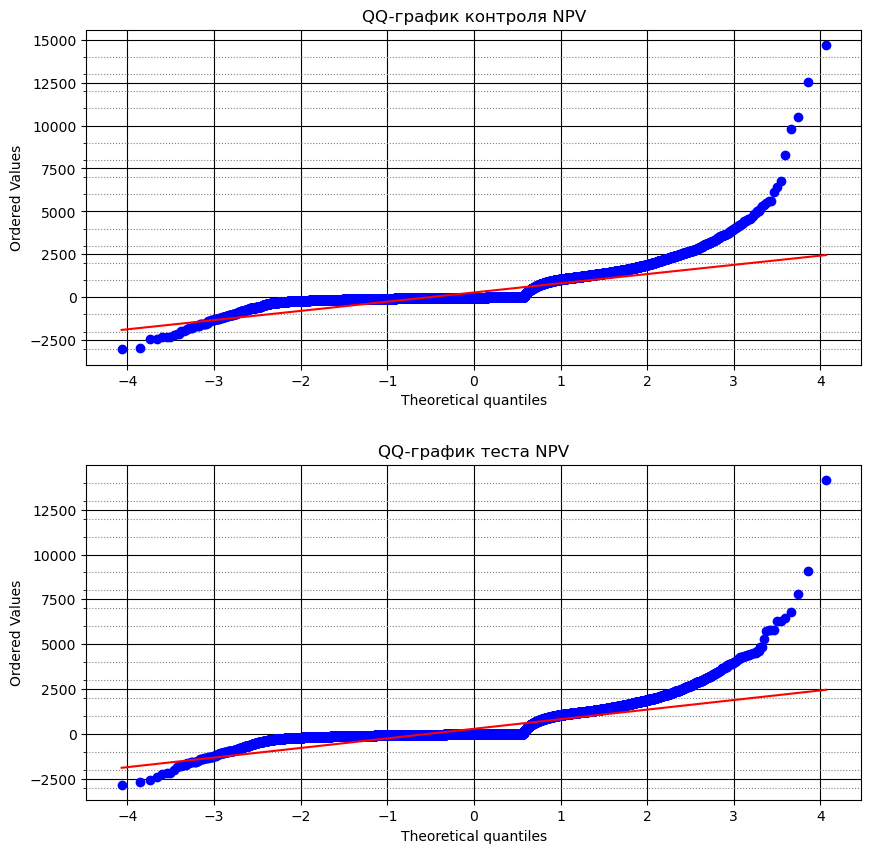

In [7]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

data1 = control["NPV"]
data2 = test["NPV"]

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.subplots_adjust(hspace = 0.3)

stats.probplot(data1, plot=ax1, fit=True)
stats.probplot(data2, plot=ax2, fit=True)

ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1000))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1000))

ax1.set_title('QQ-график контроля NPV')
ax2.set_title('QQ-график теста NPV')

fig.set_figwidth(10)
fig.set_figheight(10)

ax1.grid(which='major', color = 'k')
ax2.grid(which='major', color = 'k')
ax1.grid(which='minor', color = 'gray', linestyle = ':')
ax2.grid(which='minor', color = 'gray', linestyle = ':')

plt.show()

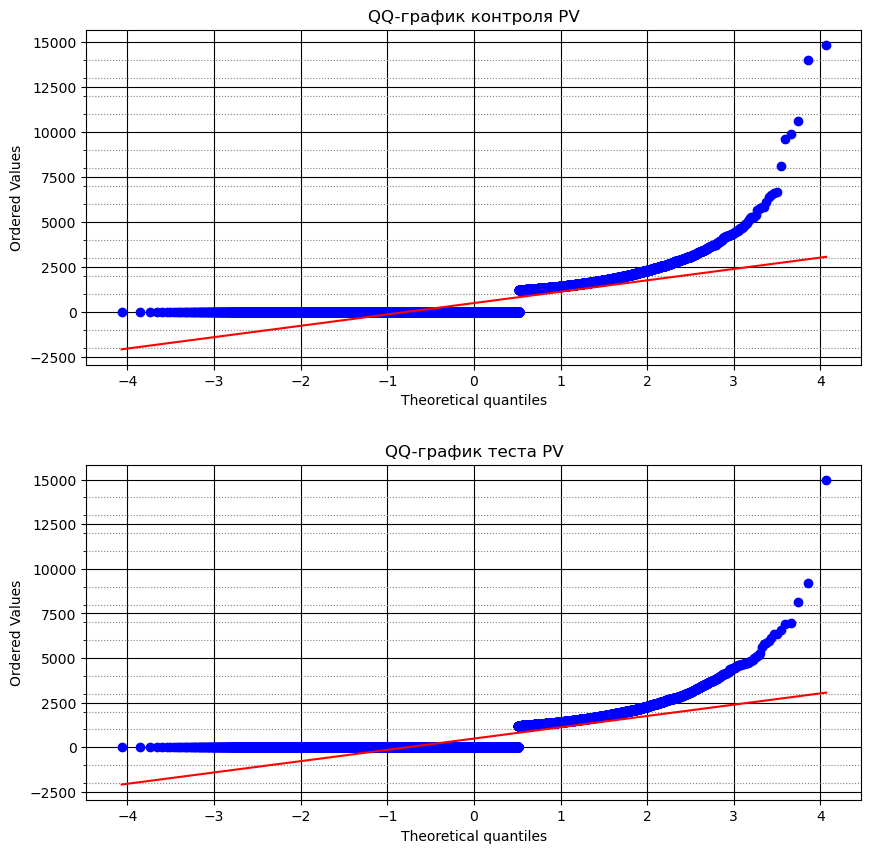

In [8]:
data3 = control["PV"]
data4 = test["PV"]

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.subplots_adjust(hspace = 0.3)

stats.probplot(data3, plot=ax1, fit=True)
stats.probplot(data4, plot=ax2, fit=True)

ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1000))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1000))

ax1.set_title('QQ-график контроля PV')
ax2.set_title('QQ-график теста PV')

fig.set_figwidth(10)
fig.set_figheight(10)

ax1.grid(which='major', color = 'k')
ax2.grid(which='major', color = 'k')
ax1.grid(which='minor', color = 'gray', linestyle = ':')
ax2.grid(which='minor', color = 'gray', linestyle = ':')

plt.show()

На оси x отображаются теоретические квантили нормального распределения, а на оси y - фактические квантили наших данных. Если данные точно соответствуют нормальному распределению, то все точки должны лежать на прямой линии.

Как мы видим на графиках, распределения выборок NPV и PV для контроля и теста точно не соответствует нормальному, однако стоит учесть, что центральная предельная теорема (ЦПТ) утверждает, что при достаточно большом объеме выборки из любого распределения с конечной дисперсией, распределение выборочного среднего будет приближаться к нормальному распределению с увеличением объема выборки.

Таким образом, **применение t-критерия при ненормальном распределении метрики и большом объеме выборки обосновано на основе Центральной предельной теоремы**, которая гарантирует приближение выборочного среднего к нормальному распределению с ростом объема выборки.

In [9]:
from scipy import stats

t_statistic, p_value = stats.ttest_ind(data1, data2, alternative='greater')

print('t_statistic = %.3f, p_value = %.3f' % (t_statistic, p_value))

if p_value > 0.05:
  print('Мы не можем отвергнуть нулевую гипотезу')
else:
  print('Мы можем отвергнуть нулевую гипотезу')


t_statistic = -0.908, p_value = 0.818
Мы не можем отвергнуть нулевую гипотезу


In [10]:
from scipy import stats

t_statistic, p_value = stats.ttest_ind(data3, data4, alternative='greater')

print('t_statistic = %.3f, p_value = %.3f' % (t_statistic, p_value))

if p_value > 0.05:
  print('Мы не можем отвергнуть нулевую гипотезу')
else:
  print('Мы можем отвергнуть нулевую гипотезу')

t_statistic = -0.799, p_value = 0.788
Мы не можем отвергнуть нулевую гипотезу


По результатам использования t-критерия мы видим, что $p-value$ для целевой и прокси метрик, что много больше, чем заданная $α = 0.05$, а это говорит о том, что **мы не можем принять альтернативную гипотезу и отказаться от нашей нулевой гипотезы: Уменьшение цены продукта не влияет на доходность продукта.**

---

**Вывод**:
Если мы уменьшим цену на продукт, то доходность продукта от этого не возрастет, поэтому смысла уменьшать цену нет.

------------------

##  <ins>Задание 2.</ins>

### 1. Необходимо выбрать метрику и привести аргументацию.

По условию задачи, нашей целью является увеличение доходности кредитных карт и связанных услуг. Лучше всего данный показатель отражает **метрика NPV** = PV КК + PV услуги - Расходы, поэтому мы выберем ее за **целевую**. **Прокси-метриками** соответственно будут **PV КК** и **PV услуги**, так как остальные метрики отражают свойства клиентов: возраст, доход, скоринг. **Расходы** можно принять за **контрольную метрику**.

### 2. Альтернатива в критерии.

Наша нулевая гипотеза для **целевой метрики**: "Продажи более агрессивным способом не влияют на увеличение NPV". Альтернативная гипотеза: "Продажи более агрессивным способом приводят к увеличению NPV". То есть мы вновь ожидаем, что выборочное среднее теста будет больше, чем контроля, следовательно, будем использовать **одностороннюю альтернативу**.

Для **прокси-метрик** у нас нет ожиданий в какую сторону должно отклониться среднее, поэтому будем использовать **двухстороннюю альтернативу**.

### 3. Нужно выбрать параметр(-ы), влияющий(-ие) на целевую метрику. Привести аргументацию.

Чтобы рассмотреть все возможные варианты влияния других параметров на нашу целевую метрику, прокси-метрики, можно построить **корреляционную матрицу**.

In [11]:
file_path = 'historical data/hist_credit_card.csv'

file2 = pd.read_csv(file_path)

print(file2)

            ID  Возраст  Доход клиента  Вероятность банкротства  \
0            0       19   21620.835463                 0.138061   
1            1       27   24897.990863                 0.035508   
2            2       50   23989.526947                 0.098793   
3            3       18   38442.409756                 0.365661   
4            4       24   21291.521612                 0.036909   
...        ...      ...            ...                      ...   
123250  123250       32   26099.633927                 0.110756   
123251  123251       20   24579.749275                 0.113920   
123252  123252       36   34062.902531                 0.247122   
123253  123253       67   24609.838522                 0.020752   
123254  123254       36   23378.281337                 0.092221   

        Флаг утилизации счёта  Расходы  PV КК  PV услуги    NPV  
0                           0      102      0          0   -102  
1                           1      409  11686       1754  13031

In [12]:
corr = file2.corr().round(2)
corr.style.background_gradient(cmap='coolwarm')

,ID,Возраст,Доход клиента,Вероятность банкротства,Флаг утилизации счёта,Расходы,PV КК,PV услуги,NPV
ID,1.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.010000,-0.000000
Возраст,-0.000000,1.000000,0.000000,-0.000000,0.010000,0.000000,0.000000,0.010000,0.000000
Доход клиента,0.000000,0.000000,1.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000
Вероятность банкротства,0.000000,-0.000000,-0.000000,1.000000,-0.220000,-0.100000,-0.040000,-0.140000,-0.050000
Флаг утилизации счёта,-0.000000,0.010000,0.000000,-0.220000,1.000000,0.450000,0.200000,0.650000,0.230000
Расходы,-0.000000,0.000000,0.000000,-0.100000,0.450000,1.000000,0.090000,0.290000,0.090000
PV КК,-0.000000,0.000000,-0.000000,-0.040000,0.200000,0.090000,1.000000,0.130000,1.000000
PV услуги,-0.010000,0.010000,-0.000000,-0.140000,0.650000,0.290000,0.130000,1.000000,0.180000
NPV,-0.000000,0.000000,-0.000000,-0.050000,0.230000,0.090000,1.000000,0.180000,1.000000


**Интерпретация**:

Мы хотим найти такую метрику, которая является свойством клиента: возраст, доход, вероятность банкротства; чтобы на ее основе проверять однородность контрольной и тестовой выборок. Из всех перечисленных отрицательной корреляцией обладает только **вероятность банкротства**, то есть чем ниже эта вероятность, тем выше будет доходность от клиента.

### 4.1. Каков размер выборки? Привести аргументацию и написать как получилось то или иное число.

Для расчета размера выборки можно воспользоваться формулой для **небинарного распределения с односторонней альтернативой**:

 $$
 n = \frac{2\sigma^{2} (Z_{1 - \alpha} + Z_{1 - \beta})^{2}}{\Delta^{2}}
 $$

Из формулы видно, что нам требуется стандартное отклонение $\sigma$, а также $\Delta = MDE$.

Найдем их по историческим данным.

In [13]:
sigma = np.std(file2["NPV"])
print('sigma =', sigma)

sigma = 21758.53912164772


$\Delta = MDE = $ процентное изменение нашей метрики * среднее значение метрики в исторических данных

In [14]:
average = np.mean(file2["NPV"])
delta = 0.03*average

print('delta =', delta)

delta = 256.8063565778265


**Итоговый размер выборки**


Z1-α - критическое значение стандартного нормального распределения для уровня значимости α/2 (в нашем случае α=0.05)


Z1-β - критическое значение стандартного нормального распределения для мощности теста β (в нашем случае β=0.15)

In [15]:
import scipy.stats

z_alfa = scipy.stats.norm.ppf(1-.05)
z_betta = scipy.stats.norm.ppf(1-.15)

print('z_alfa =', z_alfa)
print('z_betta =', z_betta)

z_alfa = 1.6448536269514722
z_betta = 1.0364333894937898


In [16]:
n = ((2*(sigma**2))*((z_alfa + z_betta)**2))/(delta**2)

print('Объем выборки = ', n.round())

Объем выборки =  103220.0


### 5. Проверка на однородность, применение критерия. Принятие решения. Расписать подробно с аргументами.

Проверим наши выборки на однородность по параметру "Вероятность банкротства".
Для проверки однородности двух выборок относительно небинарной метрики можно использовать непараметрический критерий, например, критерий Манна-Уитни (или U-критерий Вилкоксона) или критерий Краскелла-Уоллиса.

Важно, чтобы выборки были однородны относительно этого параметра, так как он может повлиять на нашу целевую метрику.

In [17]:
file_path_test_2 = 'control and test data task 2/test2.csv'
file_path_control_2 = 'control and test data task 2/control2.csv'

test2 = pd.read_csv(file_path_test_2)
control2 = pd.read_csv(file_path_control_2)

In [18]:
from scipy.stats import mannwhitneyu

data1 = control2["Вероятность банкротства"]
data2 = test2["Вероятность банкротства"]

u_statistic, p_value = mannwhitneyu(data1, data2)
alpha = 0.02

if p_value < alpha:
    print("Распределения выборок статистически значимо различны.")
else:
    print("Распределения выборок не отличаются статистически значимо.")

Распределения выборок статистически значимо различны.


In [19]:
from scipy.stats import kruskal

h_statistic, p_value = kruskal(data1, data2)

if p_value < alpha:
    print("Медианы выборок статистически значимо различны.")
else:
    print("Медианы выборок не отличаются статистически значимо.")

Медианы выборок статистически значимо различны.


Оба теста показали, что есть статистически значимая разница в выборках относительно данной метрики. Графики и визуализации для наглядного представления различий между выборками помогут оценить насколько критична ситуация. Например, гистограммы, ящики с усами (box plots) или точечные диаграммы могут помочь идентифицировать и визуально оценить различия в распределении метрики.

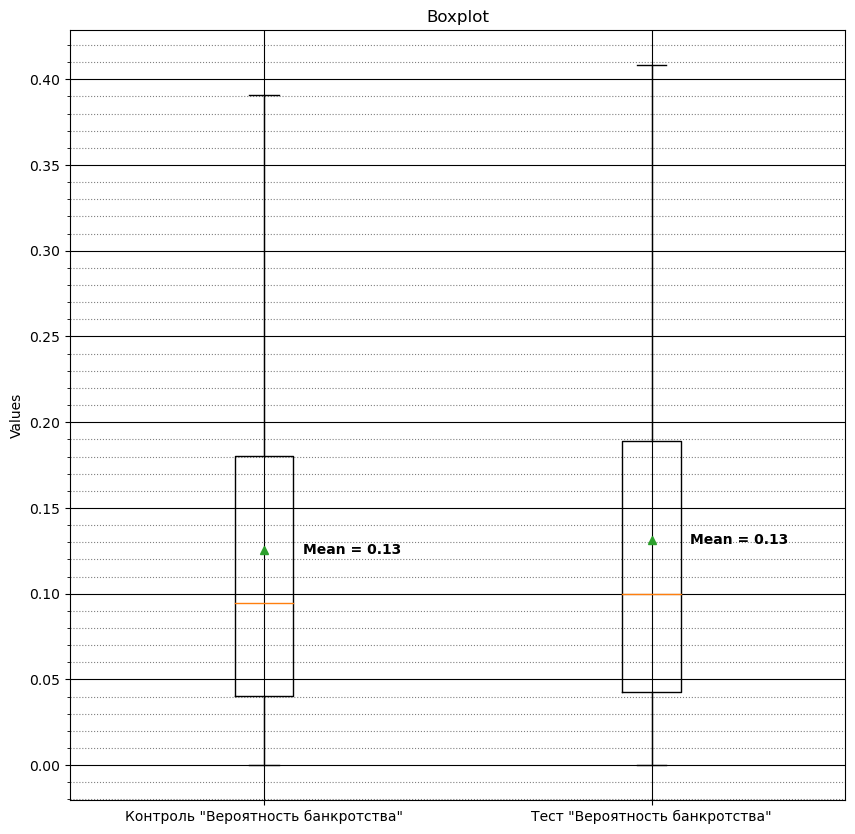

In [20]:
fig, ax = plt.subplots()

fig.set_figwidth(10)
fig.set_figheight(10)

ax.boxplot([data1, data2], showfliers=False, showmeans=True)

average_control = np.mean(data1)
average_test = np.mean(data2)
plt.text(1.1, average_control, f'Mean = {average_control:.2f}', va='center', fontweight='bold')
plt.text(2.1, average_test, f'Mean = {average_test:.2f}', va='center', fontweight='bold')

ax.yaxis.set_minor_locator(ticker.MultipleLocator(.01))
ax.grid(which='major', color = 'k')
ax.grid(which='minor', color = 'gray', linestyle = ':')

ax.set_title('Boxplot')
ax.set_xticklabels(['Контроль "Вероятность банкротства"', 'Тест "Вероятность банкротства"'])
ax.set_ylabel('Values')

plt.show()

Из графиков четко видно, что распределения действительно различаются, как и их медианы, но выборочные средние не имеют весомых различий. Так как различия не сильно велики и корреляция этой метрики с целевой достаточно мала, то мы можем с некоторой долей погрешности принять выборки как достаточно однородные.

Для проверки гипотез также применим t-критерий в силу уже обозначенных причин.

In [21]:
data1 = control2["NPV"]
data2 = test2["NPV"]
data3 = control2["PV КК"]
data4 = test2["PV КК"]
data5 = control2["PV услуги"]
data6 = test2["PV услуги"]

t_statistic, p_value = stats.ttest_ind(data1, data2, alternative='greater')

print('t_statistic = %.3f, p_value = %.3f' % (t_statistic, p_value))

if p_value > 0.05:
  print('Мы не можем отвергнуть нулевую гипотезу')
else:
  print('Мы можем отвергнуть нулевую гипотезу')

t_statistic = -3.536, p_value = 1.000
Мы не можем отвергнуть нулевую гипотезу


In [22]:
t_statistic, p_value = stats.ttest_ind(data3, data4)

print('t_statistic = %.3f, p_value = %.3f' % (t_statistic, p_value))

if p_value > 0.05:
  print('Мы не можем отвергнуть нулевую гипотезу')
else:
  print('Мы можем отвергнуть нулевую гипотезу')

t_statistic = 16.516, p_value = 0.000
Мы можем отвергнуть нулевую гипотезу


In [23]:
t_statistic, p_value = stats.ttest_ind(data5, data6)

print('t_statistic = %.3f, p_value = %.3f' % (t_statistic, p_value))

if p_value > 0.05:
  print('Мы не можем отвергнуть нулевую гипотезу')
else:
  print('Мы можем отвергнуть нулевую гипотезу')

t_statistic = -123.930, p_value = 0.000
Мы можем отвергнуть нулевую гипотезу


**Интерпретация**:

Наша целевая метрика имеет p-value, которое стремится к 1. Это значит, что, скорее всего, статистически значимых отклонений в выборках нет, поэтому мы не можем отвергнуть нулевую гипотезу. Это говорит о том, что более агрессивные продажи никак не повлияли на увеличение NPV.

Наши прокси-метрики имеют стат. значимые различия, так как их p-value стремится к нулю, но мы не знаем в какую сторону тестовая выборка сместилась относительно контрольной. Для дополнительного анализа можем посмотреть на наши распределения используя график - ящик с усами, также это нам поможем убедиться, что наши вычисления верные.

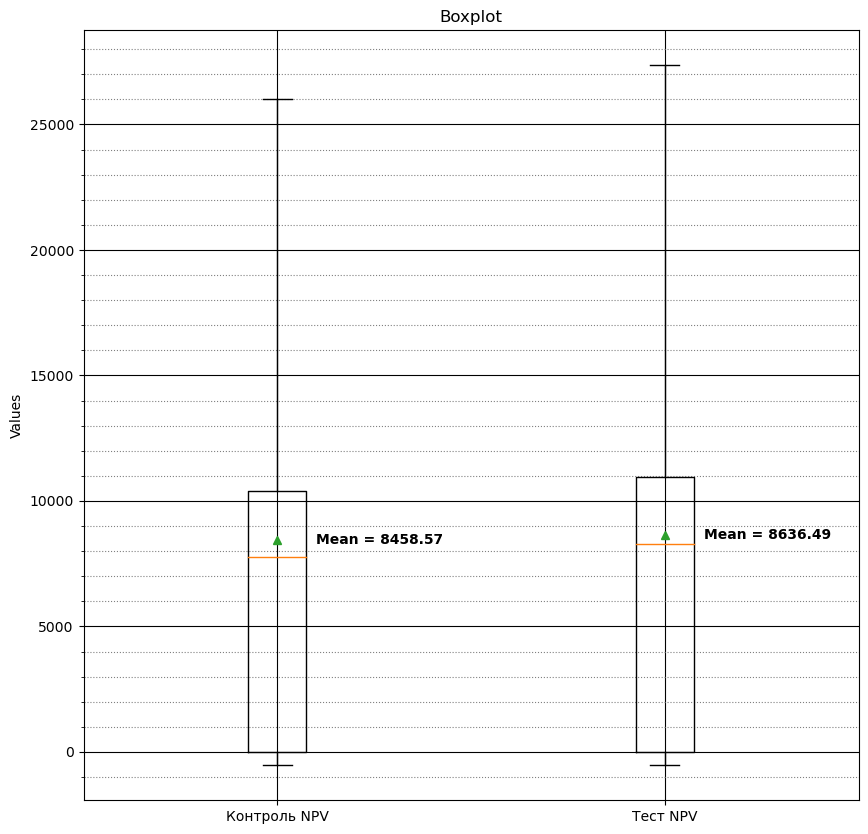

In [24]:
fig, ax = plt.subplots()

fig.set_figwidth(10)
fig.set_figheight(10)

ax.boxplot([data1, data2], showfliers=False, showmeans=True)

average_control = np.mean(data1)
average_test = np.mean(data2)
plt.text(1.1, average_control, f'Mean = {average_control:.2f}', va='center', fontweight='bold')
plt.text(2.1, average_test, f'Mean = {average_test:.2f}', va='center', fontweight='bold')

ax.yaxis.set_minor_locator(ticker.MultipleLocator(1000))
ax.grid(which='major', color = 'k')
ax.grid(which='minor', color = 'gray', linestyle = ':')

ax.set_title('Boxplot')
ax.set_xticklabels(['Контроль NPV', 'Тест NPV'])
ax.set_ylabel('Values')

plt.show()

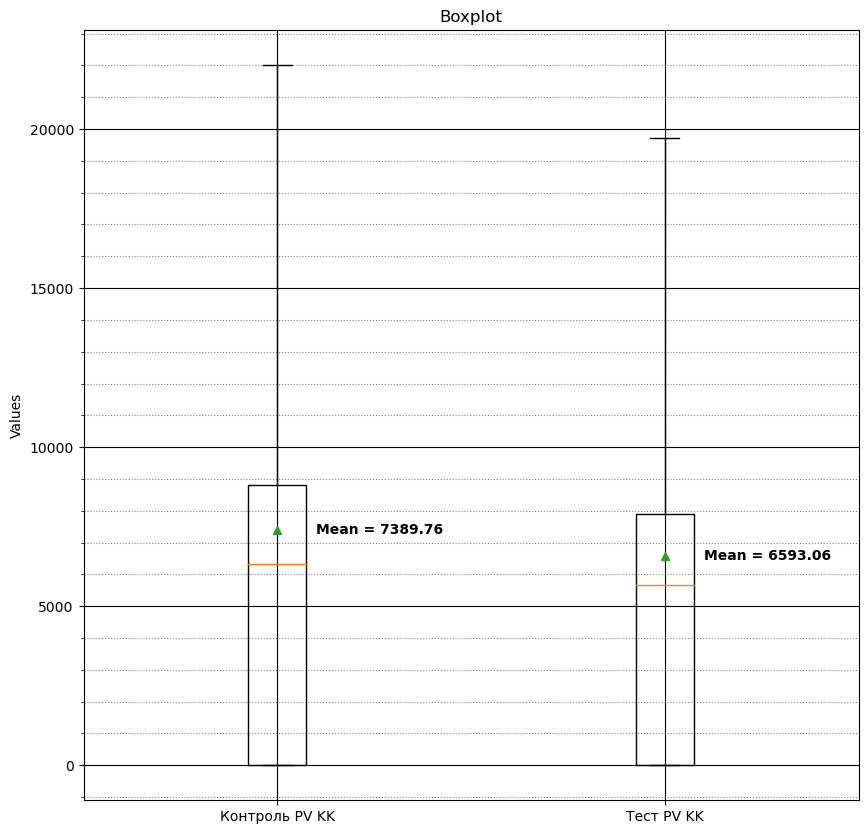

In [25]:
fig, ax = plt.subplots()

fig.set_figwidth(10)
fig.set_figheight(10)

ax.boxplot([data3, data4], showfliers=False, showmeans=True)

average_control = np.mean(data3)
average_test = np.mean(data4)
plt.text(1.1, average_control, f'Mean = {average_control:.2f}', va='center', fontweight='bold')
plt.text(2.1, average_test, f'Mean = {average_test:.2f}', va='center', fontweight='bold')

ax.yaxis.set_minor_locator(ticker.MultipleLocator(1000))
ax.grid(which='major', color = 'k')
ax.grid(which='minor', color = 'gray', linestyle = ':')

ax.set_title('Boxplot')
ax.set_xticklabels(['Контроль PV KK', 'Тест PV KK'])
ax.set_ylabel('Values')

plt.show()

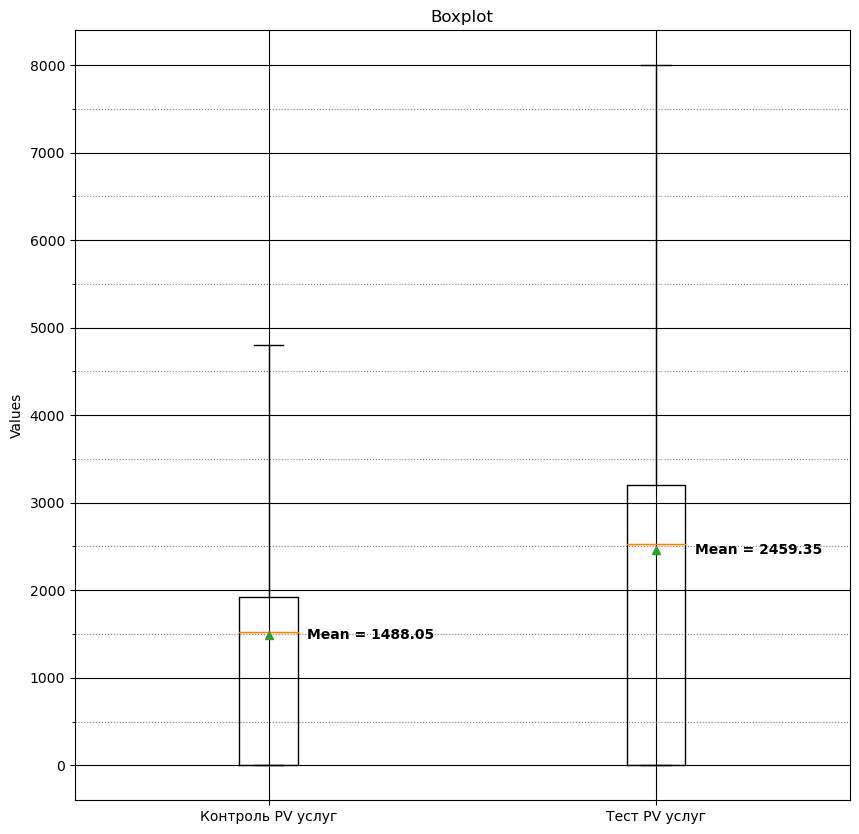

In [26]:
fig, ax = plt.subplots()

fig.set_figwidth(10)
fig.set_figheight(10)

ax.boxplot([data5, data6], showfliers=False, showmeans=True)

average_control = np.mean(data5)
average_test = np.mean(data6)
plt.text(1.1, average_control, f'Mean = {average_control:.2f}', va='center', fontweight='bold')
plt.text(2.1, average_test, f'Mean = {average_test:.2f}', va='center', fontweight='bold')

ax.yaxis.set_minor_locator(ticker.MultipleLocator(500))
ax.grid(which='major', color = 'k')
ax.grid(which='minor', color = 'gray', linestyle = ':')

ax.set_title('Boxplot')
ax.set_xticklabels(['Контроль PV услуг', 'Тест PV услуг'])
ax.set_ylabel('Values')

plt.show()

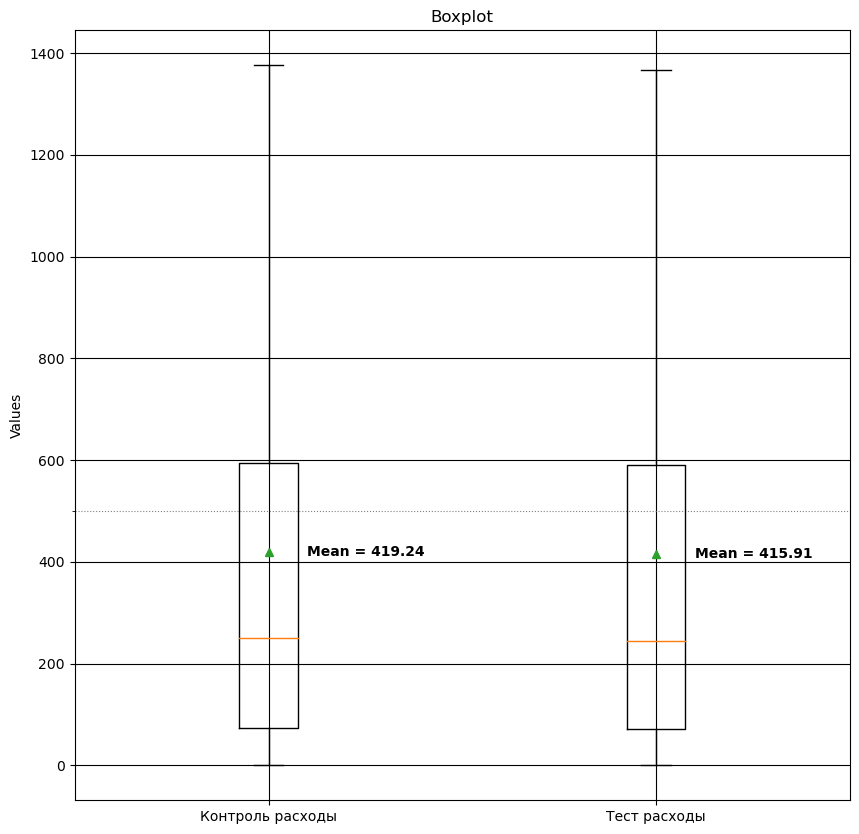

In [27]:
data7 = control2["Расходы"]
data8 = test2["Расходы"]

fig, ax = plt.subplots()

fig.set_figwidth(10)
fig.set_figheight(10)

ax.boxplot([data7, data8], showfliers=False, showmeans=True)

average_control = np.mean(data7)
average_test = np.mean(data8)
plt.text(1.1, average_control, f'Mean = {average_control:.2f}', va='center', fontweight='bold')
plt.text(2.1, average_test, f'Mean = {average_test:.2f}', va='center', fontweight='bold')

ax.yaxis.set_minor_locator(ticker.MultipleLocator(500))
ax.grid(which='major', color = 'k')
ax.grid(which='minor', color = 'gray', linestyle = ':')

ax.set_title('Boxplot')
ax.set_xticklabels(['Контроль расходы', 'Тест расходы'])
ax.set_ylabel('Values')

plt.show()

**Вывод**:

Мы окончательно убедились в том, что наша целевая метрика NPV не имеет существенных различий между контрольной выборкой и тестовой. Скорее всего, это связно с тем, что PV кредитных карт сильно уменьшилось, PV услуг сильно увеличилось, а также наша контрольная метрика - расходы, никак не изменилась (что очень хорошо), именно поэтому NPV, как некая интегральная метрика для PV KK, PV услуг и расходов (NPV = PV КК + PV услуги - Расходы) не поменялась. Поэтому продавать продукт более агрессивным способом для увелечения доходности не имеет смысла.